In [1]:
%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn

import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime   
from torch.utils.data import Dataset, DataLoader
import os
from scipy import io, signal
import math
import random
import h5py
from tqdm import tqdm

import import_ipynb


os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="1"

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


## Data processing step

1. Point-wise divide the corresponding sensitivity map for each coil
1. Take the sum to generate DICOM image
1. Apply motion
1. Multiply each sensitivity map to re-generate multi-coil data
1. Take sum to generate the motion-corrupted DICOM image

* sensitivity map: 224 x 224 x 16 x 7 x 32 -> preprocessing 거치면 224 x 224 x 16 x 1 x 32. 경로만 바꿔주면 됨
* 가로 x 세로 x slice x contrast(여러 개의 TE 값, 여기서는 0번만 사용) x coil
* sensitivity와 uncombined data 모두 image domain임!

In [176]:
from module.data_simulation import MotionParameters, Simulator

image_path = "./Data/Uncombined_data1/"
sens_path = "./Data/sensitivity1/"
init_rot = 0.0
motion_ran_lb = [0,0,0] #(offset, x-dif, y-dif)
motion_ran_ub = [0.01,0.01,0.01]
motion_PE_ran = [0, 32]
SNR_ran = [0,0]
img_size = [224, 224]

params = MotionParameters(img_size, SNR_ran, motion_ran_lb, motion_ran_ub, motion_PE_ran, rot=init_rot)
sim = Simulator(image_path, sens_path, params)

In [177]:
corrupted, label, postmotion_dicom, dicom_image = sim[29]

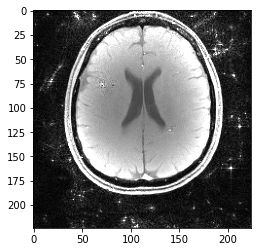

PE line when motion occurrred: 19
1.9578031753792292e-06


In [178]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(abs(postmotion_dicom), cmap="gray", vmin=0, vmax=5e-6)
plt.show()
print(f"PE line when motion occurrred: {label}")
print(abs(postmotion_dicom).mean())

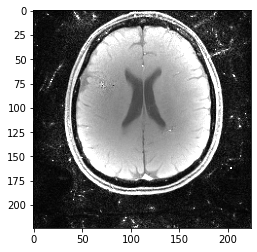

PE line when motion occurrred: 19
1.942154e-06


In [179]:
plt.imshow(abs(dicom_image), cmap="gray", vmin =0, vmax=5e-6)
plt.show()
print(f"PE line when motion occurrred: {label}")
print(abs(dicom_image).mean())

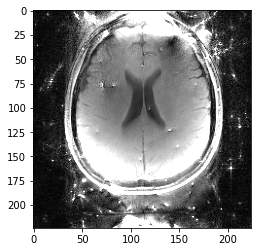

In [180]:
plt.imshow(abs(np.fft.ifftn(corrupted, axes=(0,1))), cmap="gray", vmin =0, vmax=5e-6*32)

In [1]:
import h5py

with h5py.File("./Data/h5/train/0.h5") as f:
    print(list(f))


['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']
